# Logistic Regression

## Overview

Logistic regression is a fundamental supervised learning algorithm for binary classification. It predicts the probability that an observation belongs to one of two classes (e.g., “rainy” vs. “sunny”) using a linear model combined with a sigmoid function to produce outputs in the range $[0, 1]$.

The model is interpretable, easy to implement, and serves as the basis for more advanced classification methods.

---

## The Logistic Regression Equation

For input features $X = (x_1, x_2, \dots, x_k)$, the model predicts the probability of the positive class as:

$$
P(y = 1 \mid X) = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

where

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k
$$

Here, $\beta_0, \beta_1, \dots, \beta_k$ are the model coefficients ("weights").

The sigmoid function $\sigma(z)$ squashes the linear output into the interval $(0, 1)$, making it interpretable as a probability.

---


## The Role of the Sigmoid Function

The sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- Converts any real value $z$ into $(0,1)$ for probability interpretation.
- Links the linear predictor to the probability of the positive class.
- Its smooth and differentiable shape allows for efficient optimization.

---



In [73]:
import numpy as np
import jdc
import matplotlib.pyplot as plt
%load_ext jdc

class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

The jdc module is not an IPython extension.


## Making Predictions

Predicted probability:

$$
P(y=1|X) = \sigma(z)
$$

Class label prediction (with threshold $t$):

$$
\hat{y} = \begin{cases}
1 & \text{if } P(y=1|X) \geq t \\
0 & \text{otherwise}
\end{cases}
$$


In [74]:
%%add_to LogisticRegression

def predict_proba(self, X):
    z = np.dot(X, self.w) + self.b
    return self.sigmoid(z)

def predict(self, X, threshold=0.5):
    return (self.predict_proba(X) >= threshold).astype(int)


## Loss Function: Log-Loss (Cross-Entropy Loss)

Log-Loss, also known as **binary cross-entropy loss**, is the standard loss function for binary classification tasks such as logistic regression.

$$
\text{Log-Loss} = -\frac{1}{n} \sum_{i=1}^n \left[
    y_i \log(p_i) + (1 - y_i) \log(1 - p_i)
\right]
$$

- \( y_i \): True label for sample \( i \) (either 0 or 1)
- \( p_i \): Predicted probability for sample \( i \) (output from the model, between 0 and 1)
- \( n \): Number of samples

---

### Intuition

- If the true label is **1** (\( y_i = 1 \)), only the \( log(pi) \) term is counted.
- If the true label is **0** (\( y_i = 0 \)), only the \( log(1 - pi) \) term is counted.
- Log-loss **strongly penalizes** confident but incorrect predictions (e.g., predicting \( p_i = 0.01 \) when \( y_i = 1 \)), making it highly sensitive to errors in probabilistic output.

---


In [75]:
%%add_to LogisticRegression

def log_loss(self, y, y_hat):
    # Binary cross-entropy
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1 - eps)  # Avoid log(0)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))



## Model Fitting: Gradient Descent

To fit the model (i.e., find the best $\beta$ values), we minimize log-loss using gradient descent:

- Start with initial guesses for the coefficients.
- Iteratively update each parameter:

$$
\beta_j \gets \beta_j - \alpha \frac{\partial \, \text{Log-Loss}}{\partial \beta_j}
$$

- $\alpha$ is the learning rate (step size).
- The process repeats until convergence.

---


## Interpreting Coefficients

- Each $\beta_j$ shows the change in the log-odds for a one-unit increase in $x_j$ (all else fixed).
- The odds are $p/(1-p)$ and the log-odds (logit) is $\log\left(\frac{p}{1-p}\right)$.
- Exponentiating a coefficient (e.g., $e^{\beta_j}$) gives the **multiplicative change in the odds**.

---

In [76]:
%%add_to LogisticRegression

def fit(self, X, y):
    
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1)
    m, n = X.shape
    self.w = np.zeros(n)
    self.b = 0.0
    self.loss_history = []
    for _ in range(self.n_iters):
        z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(z)
        dw = np.dot(X.T, (y_hat - y)) / m
        db = np.sum(y_hat - y) / m
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db
        
            # Record the loss value for plotting
        loss = self.log_loss(y, y_hat)
        self.loss_history.append(loss)
    print ("weight: ",self.w)
    print ("Biases: ",self.b)


In [77]:
%%add_to LogisticRegression

def plot_loss(self):
    plt.figure(figsize=(7, 4))
    plt.plot(self.loss_history, label="Log-Loss during training")
    plt.xlabel("Iteration")
    plt.ylabel("Log-Loss")
    plt.title("Convergence of Logistic Regression")
    plt.legend()
    plt.grid(True)
    plt.show()

## Computation Graph for One Step of Gradient Descent

The sequence of computations in each iteration:

1. Input data: $X$, $y$, weights $\boldsymbol{\beta}$, bias $\beta_0$
2. Linear combination: $z = X\boldsymbol{\beta} + \beta_0$
3. Sigmoid activation: $\hat{\mathbf{y}} = \sigma(z)$
4. Compute loss:
   $$
   L = -\frac{1}{m} \sum_{i=1}^m \left(
      y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
   \right)
   $$
5. Compute gradients:
   $$
   dw = \frac{1}{m} X^T (\hat{\mathbf{y}} - \mathbf{y})
   $$
   $$
   db = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
   $$
6. Update parameters:
   $$
   \boldsymbol{\beta} \gets \boldsymbol{\beta} - \text{learning rate} \times dw
   $$
   $$
   \beta_0 \gets \beta_0 - \text{learning rate} \times db
   $$

### Visual Diagram

You can visualize the flow as:



In [78]:
# Example usage
np.random.seed(0)
X = np.vstack([np.random.randn(100, 2) + 2, np.random.randn(100, 2) - 2])
y = np.hstack([np.ones(100), np.zeros(100)])


weight:  [1.93405985 1.90621262]
Biases:  0.12372611235269244
Training accuracy: 1.0


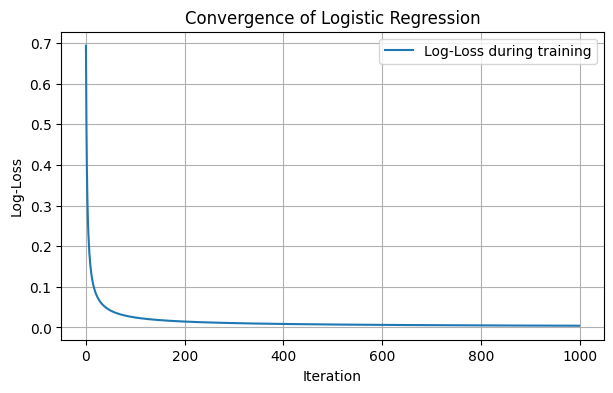

In [79]:

model = LogisticRegression(learning_rate=0.1, n_iters=1000)
model.fit(X, y)

y_pred = model.predict(X)
print("Training accuracy:", np.mean(y_pred == y))
model.plot_loss()
